# Introduction

Notebook to analyze the **False Positive** Results for each model in the context of traceability between features and bug reports.

# Load Libraries and Datasets

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

from modules.models_runner import feat_br_strat_runner
from modules.utils import firefox_dataset_p2 as fd
from modules.utils import aux_functions

import warnings; warnings.simplefilter('ignore')

# Run All Models

## Volunteers Only Strategy

In [2]:
vol_strat_runner = feat_br_strat_runner.Feat_BR_Vol_Strat_Runner()
vol_strat_runner.execute()

oracle = vol_strat_runner.get_oracle()

evaluator_4 = vol_strat_runner.get_evaluator() 
evals_df_4 = vol_strat_runner.get_evals_df()

Feat_BR Volunteers Matrix shape: (91, 19)
Features.shape: (19, 8)
SelectedBugReports.shape: (91, 18)
Running LSI model -----
Running LDA model -----
Running BM25 model -----
Running W2V model -----
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 


### Load Datasets

In [3]:
bugreports = fd.Datasets.read_selected_bugreports_df()
features = fd.Datasets.read_features_df()

SelectedBugReports.shape: (91, 18)
Features.shape: (19, 8)


### Results

In [4]:
evals_df_4.head()

,model,ref_name,perc_precision,perc_recall,perc_fscore,eval_df,sim_threshold,top,trace_links_df
0,lsi,top_1_cosine_0.0,28.57,26.18,26.62,precision recall fscore Bug_Nu...,0.0,1.0,Bug_Number 1248267 1248268 125...
1,lsi,top_1_cosine_0.1,28.57,26.18,26.62,precision recall fscore Bug_Nu...,0.1,1.0,Bug_Number 1248267 1248268 125...
2,lsi,top_1_cosine_0.2,28.57,26.18,26.62,precision recall fscore Bug_Nu...,0.2,1.0,Bug_Number 1248267 1248268 125...
3,lsi,top_1_cosine_0.3,28.57,26.18,26.62,precision recall fscore Bug_Nu...,0.3,1.0,Bug_Number 1248267 1248268 125...
4,lsi,top_1_cosine_0.4,28.57,26.18,26.62,precision recall fscore Bug_Nu...,0.4,1.0,Bug_Number 1248267 1248268 125...


### Grouping Results by Model

### Min Precision

model
bm25          11.87
lda            1.10
lsi           12.53
wordvector     7.64
Name: perc_precision, dtype: float64



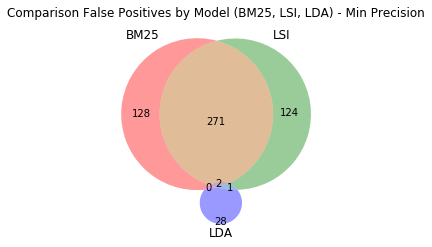

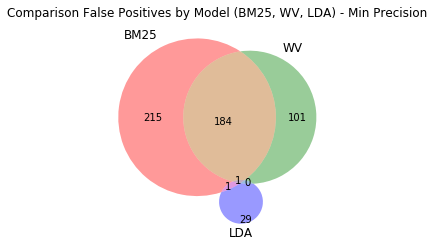

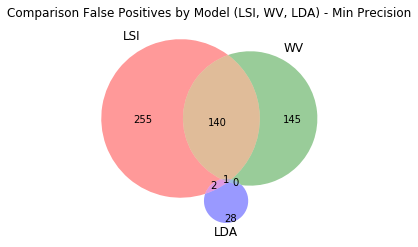

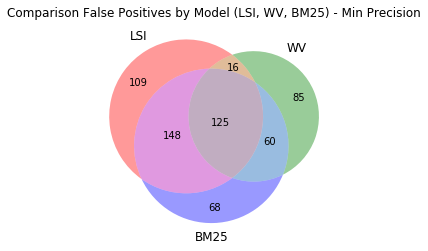

In [5]:
group = evals_df_4.groupby('model').perc_precision.min()
print(group)
print()

bm25_min_prec = group[group.index == 'bm25'].values[0]
lsi_min_prec = group[group.index == 'lsi'].values[0]
lda_min_prec = group[group.index == 'lda'].values[0]
wv_min_prec = group[group.index == 'wordvector'].values[0]

bm25_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_precision=bm25_min_prec))
lsi_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_precision=lsi_min_prec))
lda_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_precision=lda_min_prec))
wv_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_precision=wv_min_prec))

venn3([bm25_fp_set, lsi_fp_set, lda_fp_set], ['BM25','LSI','LDA'])
plt.title('Comparison False Positives by Model (BM25, LSI, LDA) - Min Precision')
plt.show()

venn3([bm25_fp_set, wv_fp_set, lda_fp_set], ['BM25','WV','LDA'])
plt.title('Comparison False Positives by Model (BM25, WV, LDA) - Min Precision')
plt.show()

venn3([lsi_fp_set, wv_fp_set, lda_fp_set], ['LSI','WV','LDA'])
plt.title('Comparison False Positives by Model (LSI, WV, LDA) - Min Precision')
plt.show()

venn3([lsi_fp_set, wv_fp_set, bm25_fp_set], ['LSI','WV','BM25'])
plt.title('Comparison False Positives by Model (LSI, WV, BM25) - Min Precision')
plt.show()

##### Exclusive Cases

In [6]:
print("BM25 Exclusive FP:")
bm25_exc_set = bm25_fp_set - lsi_fp_set - lda_fp_set - wv_fp_set
#display(bm25_exc_set)
print("len(bm25_exc_set): {}".format(len(bm25_exc_set)))

print("\n\nLSI Exclusive FP:")
lsi_exc_set = lsi_fp_set - bm25_fp_set - lda_fp_set - wv_fp_set
#display(lsi_exc_set)
print("len(lsi_exc_set): {}".format(len(lsi_exc_set)))

print("\n\nLDA Exclusive FP:")
lda_exc_set = lda_fp_set - lsi_fp_set - bm25_fp_set - wv_fp_set
#display(lda_exc_set)
print("len(lda_exc_set): {}".format(len(lda_exc_set)))

print("\n\nWV Exclusive FP:")
wv_exc_set = wv_fp_set - lda_fp_set - lsi_fp_set - bm25_fp_set
#display(wv_exc_set)
print("len(wv_exc_set): {}".format(len(wv_exc_set)))

BM25 Exclusive FP:
len(bm25_exc_set): 68


LSI Exclusive FP:
len(lsi_exc_set): 108


LDA Exclusive FP:
len(lda_exc_set): 28


WV Exclusive FP:
len(wv_exc_set): 85


##### False Positives Amount by Model

In [7]:
print("LSI FP Amount: {}".format(len(lsi_fp_set)))
print("LDA FP Amount: {}".format(len(lda_fp_set)))
print("BM25 FP Amount: {}".format(len(bm25_fp_set)))
print("WV FP Amount: {}".format(len(wv_fp_set)))

LSI FP Amount: 398
LDA FP Amount: 31
BM25 FP Amount: 401
WV FP Amount: 286


#### Max Precision

model
bm25          30.77
lda           13.19
lsi           31.32
wordvector    17.58
Name: perc_precision, dtype: float64



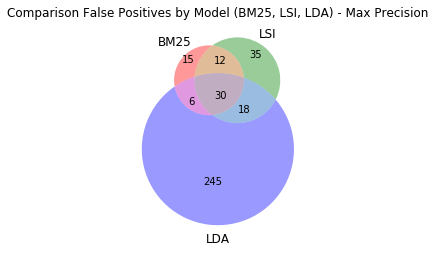

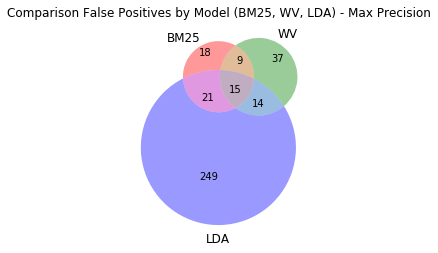

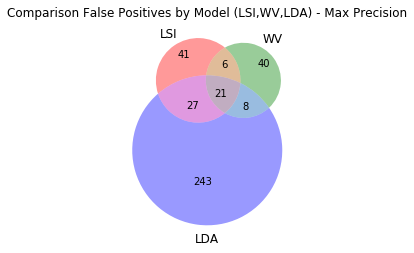

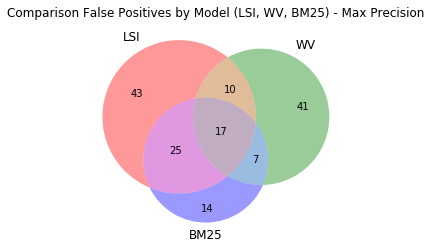

In [8]:
group = evals_df_4.groupby('model').perc_precision.max()
print(group)
print()

bm25_max_prec = group[group.index == 'bm25'].values[0]
lsi_max_prec = group[group.index == 'lsi'].values[0]
lda_max_prec = group[group.index == 'lda'].values[0]
wv_max_prec = group[group.index == 'wordvector'].values[0]

bm25_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_precision=bm25_max_prec))
lsi_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_precision=lsi_max_prec))
lda_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_precision=lda_max_prec))
wv_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_precision=wv_max_prec))

venn3([bm25_fp_set, lsi_fp_set, lda_fp_set], ['BM25','LSI','LDA'])
plt.title('Comparison False Positives by Model (BM25, LSI, LDA) - Max Precision')
plt.show()

venn3([bm25_fp_set, wv_fp_set, lda_fp_set], ['BM25','WV','LDA'])
plt.title('Comparison False Positives by Model (BM25, WV, LDA) - Max Precision')
plt.show()

venn3([lsi_fp_set, wv_fp_set, lda_fp_set], ['LSI','WV','LDA'])
plt.title('Comparison False Positives by Model (LSI,WV,LDA) - Max Precision')
plt.show()

venn3([lsi_fp_set, wv_fp_set, bm25_fp_set], ['LSI','WV','BM25'])
plt.title('Comparison False Positives by Model (LSI, WV, BM25) - Max Precision')
plt.show()

##### Exclusive Cases

In [9]:
print("BM25 Exclusive FP:")
bm25_exc_set = bm25_fp_set - lsi_fp_set - lda_fp_set - wv_fp_set
#display(bm25_exc_set)
print("len(bm25_exc_set): {}".format(len(bm25_exc_set)))

print("\n\nLSI Exclusive FP:")
lsi_exc_set = lsi_fp_set - bm25_fp_set - lda_fp_set - wv_fp_set
#display(lsi_exc_set)
print("len(lsi_exc_set): {}".format(len(lsi_exc_set)))

print("\n\nLDA Exclusive FP:")
lda_exc_set = lda_fp_set - lsi_fp_set - bm25_fp_set - wv_fp_set
#display(lda_exc_set)
print("len(lda_exc_set): {}".format(len(lda_exc_set)))

print("\n\nWV Exclusive FP:")
wv_exc_set = wv_fp_set - lda_fp_set - lsi_fp_set - bm25_fp_set
#display(wv_exc_set)
print("len(wv_exc_set): {}".format(len(wv_exc_set)))

BM25 Exclusive FP:
len(bm25_exc_set): 10


LSI Exclusive FP:
len(lsi_exc_set): 33


LDA Exclusive FP:
len(lda_exc_set): 239


WV Exclusive FP:
len(wv_exc_set): 35


##### False Positives Amount by Model

In [10]:
print("LSI FP Amount: {}".format(len(lsi_fp_set)))
print("LDA FP Amount: {}".format(len(lda_fp_set)))
print("BM25 FP Amount: {}".format(len(bm25_fp_set)))
print("WV FP Amount: {}".format(len(wv_fp_set)))

LSI FP Amount: 95
LDA FP Amount: 299
BM25 FP Amount: 63
WV FP Amount: 75


#### Min Recall

model
bm25          28.38
lda            1.10
lsi           13.32
wordvector    12.77
Name: perc_recall, dtype: float64



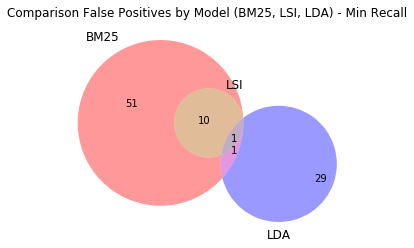

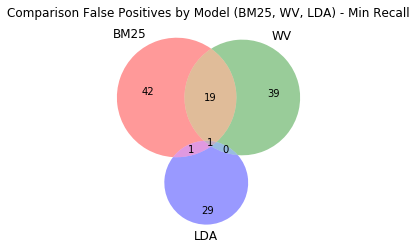

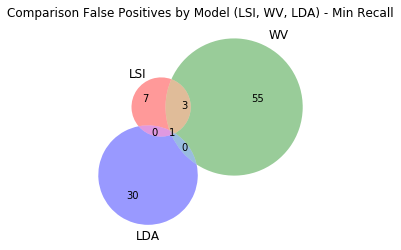

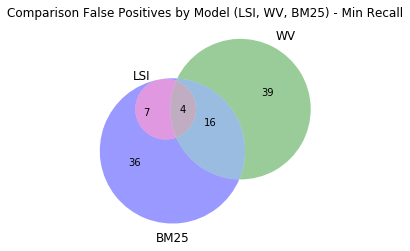

In [11]:
group = evals_df_4.groupby('model').perc_recall.min()
print(group)
print()

bm25_min_recall = group[group.index == 'bm25'].values[0]
lsi_min_recall = group[group.index == 'lsi'].values[0]
lda_min_recall = group[group.index == 'lda'].values[0]
wv_min_recall = group[group.index == 'wordvector'].values[0]

bm25_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_recall=bm25_min_recall))
lsi_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_recall=lsi_min_recall))
lda_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_recall=lda_min_recall))
wv_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_recall=wv_min_recall))

venn3([bm25_fp_set, lsi_fp_set, lda_fp_set], ['BM25','LSI','LDA'])
plt.title('Comparison False Positives by Model (BM25, LSI, LDA) - Min Recall')
plt.show()

venn3([bm25_fp_set, wv_fp_set, lda_fp_set], ['BM25','WV','LDA'])
plt.title('Comparison False Positives by Model (BM25, WV, LDA) - Min Recall')
plt.show()

venn3([lsi_fp_set, wv_fp_set, lda_fp_set], ['LSI','WV','LDA'])
plt.title('Comparison False Positives by Model (LSI, WV, LDA) - Min Recall')
plt.show()

venn3([lsi_fp_set, wv_fp_set, bm25_fp_set], ['LSI','WV','BM25'])
plt.title('Comparison False Positives by Model (LSI, WV, BM25) - Min Recall')
plt.show()

##### Exclusive Cases

In [12]:
print("BM25 Exclusive FP:")
display(bm25_fp_set - lsi_fp_set - lda_fp_set - wv_fp_set)

print("\n\nLSI Exclusive FP:")
display(lsi_fp_set - bm25_fp_set - lda_fp_set - wv_fp_set)

print("\n\nLDA Exclusive FP:")
display(lda_fp_set - lsi_fp_set - bm25_fp_set - wv_fp_set)

print("\n\nWV Exclusive FP:")
display(wv_fp_set - lda_fp_set - lsi_fp_set - bm25_fp_set)

BM25 Exclusive FP:


{('apz_async_scrolling', 1305676),
 ('context_menu', 1248268),
 ('context_menu', 1283542),
 ('context_menu', 1287823),
 ('context_menu', 1295502),
 ('context_menu', 1301056),
 ('context_menu', 1320557),
 ('context_menu', 1343256),
 ('context_menu', 1352539),
 ('flac_support', 1278388),
 ('flash_support', 1319119),
 ('flash_support', 1328913),
 ('indicator_device_perm', 1303339),
 ('indicator_device_perm', 1305737),
 ('new_awesome_bar', 1285328),
 ('new_awesome_bar', 1289240),
 ('new_awesome_bar', 1297686),
 ('new_awesome_bar', 1302468),
 ('new_awesome_bar', 1316126),
 ('new_awesome_bar', 1335538),
 ('pointer_lock_api', 1449700),
 ('tts_in_rm', 1297976),
 ('tts_in_rm', 1305195),
 ('w10_comp', 1267501),
 ('w10_comp', 1269485),
 ('w10_comp', 1313969),
 ('w10_comp', 1451475),
 ('webm_eme', 1313290),
 ('webm_eme', 1430603),
 ('windows_child_mode', 1267480),
 ('windows_child_mode', 1270274),
 ('windows_child_mode', 1285041),
 ('windows_child_mode', 1292573),
 ('windows_child_mode', 1318903),



LSI Exclusive FP:


set()



LDA Exclusive FP:


{('pdf_viewer', 1430603),
 ('webgl_comp', 1267480),
 ('webgl_comp', 1270274),
 ('webgl_comp', 1271607),
 ('webgl_comp', 1276120),
 ('webgl_comp', 1278388),
 ('webgl_comp', 1285328),
 ('webgl_comp', 1289240),
 ('webgl_comp', 1293308),
 ('webgl_comp', 1294733),
 ('webgl_comp', 1294887),
 ('webgl_comp', 1296366),
 ('webgl_comp', 1299458),
 ('webgl_comp', 1300738),
 ('webgl_comp', 1301784),
 ('webgl_comp', 1309856),
 ('webgl_comp', 1311998),
 ('webgl_comp', 1313969),
 ('webgl_comp', 1316126),
 ('webgl_comp', 1323211),
 ('webgl_comp', 1328913),
 ('webgl_comp', 1334844),
 ('webgl_comp', 1335992),
 ('webgl_comp', 1337682),
 ('webgl_comp', 1343256),
 ('webgl_comp', 1353831),
 ('webgl_comp', 1357458),
 ('webgl_comp', 1408361),
 ('zoom_indicator', 1281190)}



WV Exclusive FP:


{('context_menu', 1285328),
 ('context_menu', 1294733),
 ('context_menu', 1296366),
 ('context_menu', 1339497),
 ('context_menu', 1430603),
 ('new_awesome_bar', 1248268),
 ('new_awesome_bar', 1267501),
 ('new_awesome_bar', 1269348),
 ('new_awesome_bar', 1269485),
 ('new_awesome_bar', 1285041),
 ('new_awesome_bar', 1295502),
 ('new_awesome_bar', 1305676),
 ('new_awesome_bar', 1313969),
 ('new_awesome_bar', 1320557),
 ('new_awesome_bar', 1330745),
 ('new_awesome_bar', 1336227),
 ('new_awesome_bar', 1343256),
 ('new_awesome_bar', 1345687),
 ('new_awesome_bar', 1449700),
 ('pointer_lock_api', 1292573),
 ('w10_comp', 1318903),
 ('windows_child_mode', 1283542),
 ('windows_child_mode', 1287748),
 ('windows_child_mode', 1289240),
 ('windows_child_mode', 1292566),
 ('windows_child_mode', 1293308),
 ('windows_child_mode', 1297686),
 ('windows_child_mode', 1300738),
 ('windows_child_mode', 1301056),
 ('windows_child_mode', 1302468),
 ('windows_child_mode', 1305195),
 ('windows_child_mode', 131329

#### Max Recall

model
bm25          49.32
lda           42.28
lsi           52.06
wordvector    41.81
Name: perc_recall, dtype: float64



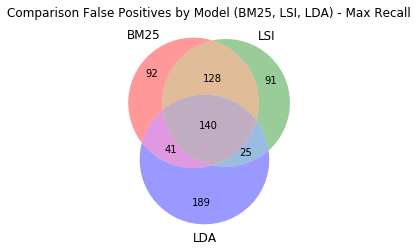

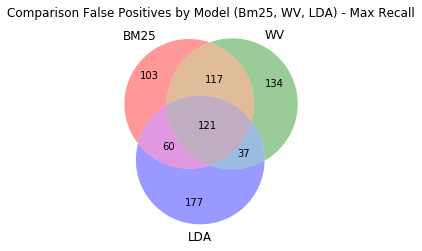

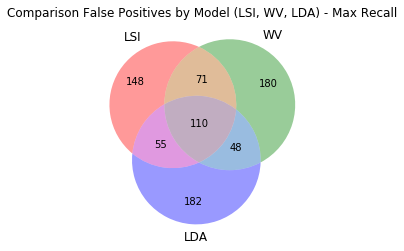

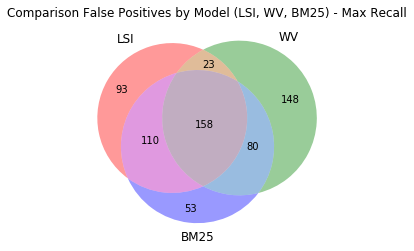

In [13]:
group = evals_df_4.groupby('model').perc_recall.max()
print(group)
print()

bm25_max_recall = group[group.index == 'bm25'].values[0]
lsi_max_recall = group[group.index == 'lsi'].values[0]
lda_max_recall = group[group.index == 'lda'].values[0]
wv_max_recall = group[group.index == 'wordvector'].values[0]

bm25_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_recall=bm25_max_recall))
lsi_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_recall=lsi_max_recall))
lda_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_recall=lda_max_recall))
wv_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_recall=wv_max_recall))

venn3([bm25_fp_set, lsi_fp_set, lda_fp_set], ['BM25','LSI','LDA'])
plt.title('Comparison False Positives by Model (BM25, LSI, LDA) - Max Recall')
plt.show()

venn3([bm25_fp_set, wv_fp_set, lda_fp_set], ['BM25','WV','LDA'])
plt.title('Comparison False Positives by Model (Bm25, WV, LDA) - Max Recall')
plt.show()

venn3([lsi_fp_set, wv_fp_set, lda_fp_set], ['LSI','WV','LDA'])
plt.title('Comparison False Positives by Model (LSI, WV, LDA) - Max Recall')
plt.show()

venn3([lsi_fp_set, wv_fp_set, bm25_fp_set], ['LSI','WV','BM25'])
plt.title('Comparison False Positives by Model (LSI, WV, BM25) - Max Recall')
plt.show()

##### Exclusive Cases

In [14]:
print("BM25 Exclusive FP:")
display(bm25_fp_set - lsi_fp_set - lda_fp_set - wv_fp_set)

print("\n\nLSI Exclusive FP:")
display(lsi_fp_set - bm25_fp_set - lda_fp_set - wv_fp_set)

print("\n\nLDA Exclusive FP:")
display(lda_fp_set - lsi_fp_set - bm25_fp_set - wv_fp_set)

print("\n\nWV Exclusive FP:")
display(wv_fp_set - lda_fp_set - lsi_fp_set - bm25_fp_set)

BM25 Exclusive FP:


{('apz_async_scrolling', 1353831),
 ('apz_async_scrolling', 1357458),
 ('context_menu', 1283542),
 ('context_menu', 1287748),
 ('context_menu', 1292566),
 ('context_menu', 1297686),
 ('context_menu', 1297976),
 ('context_menu', 1301784),
 ('context_menu', 1313290),
 ('context_menu', 1320557),
 ('context_menu', 1344446),
 ('context_menu', 1408361),
 ('context_menu', 1449700),
 ('downloads_dropmaker', 1302468),
 ('flac_support', 1278388),
 ('flac_support', 1301421),
 ('flash_support', 1289832),
 ('flash_support', 1339497),
 ('indicator_device_perm', 1292566),
 ('pointer_lock_api', 1248267),
 ('pointer_lock_api', 1248268),
 ('pointer_lock_api', 1270983),
 ('pointer_lock_api', 1276120),
 ('pointer_lock_api', 1301784),
 ('pointer_lock_api', 1309856),
 ('pointer_lock_api', 1311998),
 ('pointer_lock_api', 1323211),
 ('pointer_lock_api', 1334844),
 ('pointer_lock_api', 1343256),
 ('video_and_canvas_render', 1267480),
 ('video_and_canvas_render', 1278388),
 ('w10_comp', 1432915),
 ('w10_comp', 



LSI Exclusive FP:


{('apz_async_scrolling', 1313969),
 ('browser_customization', 1264988),
 ('browser_customization', 1269348),
 ('browser_customization', 1271607),
 ('browser_customization', 1297686),
 ('browser_customization', 1302468),
 ('browser_customization', 1305195),
 ('browser_customization', 1305737),
 ('browser_customization', 1311998),
 ('browser_customization', 1314643),
 ('browser_customization', 1328913),
 ('browser_customization', 1339497),
 ('browser_customization', 1352539),
 ('browser_customization', 1365887),
 ('browser_customization', 1430603),
 ('context_menu', 1281493),
 ('flash_support', 1323211),
 ('flash_support', 1337682),
 ('indicator_device_perm', 1305676),
 ('pdf_viewer', 1305195),
 ('pointer_lock_api', 1297976),
 ('tts_in_desktop', 1267480),
 ('tts_in_desktop', 1269485),
 ('tts_in_desktop', 1270274),
 ('tts_in_desktop', 1278388),
 ('tts_in_desktop', 1285041),
 ('tts_in_desktop', 1289240),
 ('tts_in_desktop', 1294733),
 ('tts_in_desktop', 1295502),
 ('tts_in_desktop', 131201



LDA Exclusive FP:


{('apz_async_scrolling', 1248267),
 ('apz_async_scrolling', 1270983),
 ('apz_async_scrolling', 1285328),
 ('apz_async_scrolling', 1305195),
 ('apz_async_scrolling', 1313778),
 ('context_menu', 1270274),
 ('context_menu', 1335538),
 ('context_menu', 1357085),
 ('context_menu', 1432915),
 ('flac_support', 1269348),
 ('flac_support', 1277937),
 ('flac_support', 1282759),
 ('flac_support', 1283542),
 ('flac_support', 1287748),
 ('flac_support', 1292566),
 ('flac_support', 1296861),
 ('flac_support', 1302468),
 ('flac_support', 1305676),
 ('flac_support', 1319119),
 ('flac_support', 1451475),
 ('new_awesome_bar', 1267480),
 ('pdf_viewer', 1269348),
 ('pdf_viewer', 1269485),
 ('pdf_viewer', 1277937),
 ('pdf_viewer', 1281493),
 ('pdf_viewer', 1283542),
 ('pdf_viewer', 1285041),
 ('pdf_viewer', 1287748),
 ('pdf_viewer', 1292566),
 ('pdf_viewer', 1295502),
 ('pdf_viewer', 1296861),
 ('pdf_viewer', 1297686),
 ('pdf_viewer', 1302468),
 ('pdf_viewer', 1305676),
 ('pdf_viewer', 1313290),
 ('pdf_vie



WV Exclusive FP:


{('apz_async_scrolling', 1248268),
 ('apz_async_scrolling', 1269348),
 ('apz_async_scrolling', 1270274),
 ('apz_async_scrolling', 1277937),
 ('apz_async_scrolling', 1278388),
 ('apz_async_scrolling', 1279143),
 ('apz_async_scrolling', 1279864),
 ('apz_async_scrolling', 1281190),
 ('apz_async_scrolling', 1282759),
 ('apz_async_scrolling', 1283542),
 ('apz_async_scrolling', 1285041),
 ('apz_async_scrolling', 1287748),
 ('apz_async_scrolling', 1292566),
 ('apz_async_scrolling', 1297686),
 ('apz_async_scrolling', 1301056),
 ('apz_async_scrolling', 1301784),
 ('apz_async_scrolling', 1302468),
 ('apz_async_scrolling', 1306639),
 ('apz_async_scrolling', 1313290),
 ('apz_async_scrolling', 1314643),
 ('apz_async_scrolling', 1319119),
 ('apz_async_scrolling', 1320557),
 ('apz_async_scrolling', 1323211),
 ('apz_async_scrolling', 1328913),
 ('apz_async_scrolling', 1330745),
 ('apz_async_scrolling', 1336227),
 ('apz_async_scrolling', 1344446),
 ('apz_async_scrolling', 1345687),
 ('apz_async_scrolli

In [15]:
print("LSI FP Amount: {}".format(len(lsi_fp_set)))
print("LDA FP Amount: {}".format(len(lda_fp_set)))
print("BM25 FP Amount: {}".format(len(bm25_fp_set)))
print("WV FP Amount: {}".format(len(wv_fp_set)))

LSI FP Amount: 384
LDA FP Amount: 395
BM25 FP Amount: 401
WV FP Amount: 409
